# Machine Learning

*S1-23_AIMLCZG565

*First Semester, 2023 -24, ML Group 3

*Assignment 1 – Part 1 & Part 2 Combined

*Financial Transaction Analysis

# List only the BITS (Name) of active contributors in this assignment:
1. Siddhartha Sandilya - 2023aa05705@wilp.bits-pilani.ac.in
2. Akbar Sha Ebhrahim- 2023aa05159@wilp.bits-pilani.ac.in
3. Veerla- 2023aa05099@wilp.bits-pilani.ac.in
4. Mohammed Musaveer- 2023ab05045@wilp.bits-pilani.ac.in


Coding begins here

## 1.	Import the libraries/Dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

#sci-kit
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegressionCV
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
# Read the data
df = pd.read_csv('Assignment_1_Set1.csv')

In [3]:
# Top 2 rows
df.head(2)

,Amount,Date,Card Type,MCC Category,Location,Device,Previous Transactions,Balance Before Transaction,Time of Day,Velocity,Customer Age,Customer Income,Card Limit,Credit Score,Merchant Reputation,Merchant Location History,Spending Patterns,Online Transactions Frequency,Is Fraudulent
0,180.924993,02-07-2023,Debit,Electronics,UK,Desktop,6,919.055267,10,-0.337955,52,105545.34050,2503.758986,401,Average,6,828.820298,Medium,0
1,794.625797,18-02-2023,Prepaid,Groceries,Canada,Desktop,5,3529.930762,17,0.015117,62,92651.85441,12885.681730,409,Average,13,4384.528307,Low,1


In [4]:
# Column names
df.columns

Index(['Amount', 'Date', 'Card Type', 'MCC Category', 'Location', 'Device',
       'Previous Transactions', 'Balance Before Transaction', 'Time of Day',
       'Velocity', 'Customer Age', 'Customer Income', 'Card Limit',
       'Credit Score', 'Merchant Reputation', 'Merchant Location History',
       'Spending Patterns', 'Online Transactions Frequency', 'Is Fraudulent'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Amount                         1000 non-null   float64
 1   Date                           1000 non-null   object 
 2   Card Type                      1000 non-null   object 
 3   MCC Category                   1000 non-null   object 
 4   Location                       1000 non-null   object 
 5   Device                         1000 non-null   object 
 6   Previous Transactions          1000 non-null   int64  
 7   Balance Before Transaction     1000 non-null   float64
 8   Time of Day                    1000 non-null   int64  
 9   Velocity                       1000 non-null   float64
 10  Customer Age                   1000 non-null   int64  
 11  Customer Income                1000 non-null   float64
 12  Card Limit                     1000 non-null   fl

In [6]:
# Shape and Size
df.shape

(1000, 19)

In [7]:
# Statistical summary
df.describe(include = 'all')

,Amount,Date,Card Type,MCC Category,Location,Device,Previous Transactions,Balance Before Transaction,Time of Day,Velocity,Customer Age,Customer Income,Card Limit,Credit Score,Merchant Reputation,Merchant Location History,Spending Patterns,Online Transactions Frequency,Is Fraudulent
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,340,3,7,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,3,NaN
top,NaN,27-08-2023,Credit,Travel,US,Desktop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad,NaN,NaN,Medium,NaN
freq,NaN,10,353,166,224,341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350,NaN,NaN,343,NaN
mean,520.177431,NaN,NaN,NaN,NaN,NaN,4.399000,4975.500335,11.425000,0.000316,49.432000,82963.616616,10474.007101,575.5080,NaN,9.754000,2746.678736,NaN,0.053000
std,279.342434,NaN,NaN,NaN,NaN,NaN,2.828745,2841.249947,6.834697,0.296206,17.332853,37021.434933,5734.063838,156.4581,NaN,5.395238,1311.365916,NaN,0.224146
min,10.456991,NaN,NaN,NaN,NaN,NaN,0.000000,123.460877,0.000000,-0.499891,20.000000,20084.715400,526.910912,300.0000,NaN,1.000000,500.559090,NaN,0.000000
25%,277.978547,NaN,NaN,NaN,NaN,NaN,2.000000,2435.129680,5.000000,-0.256706,35.000000,51725.434925,5287.512915,441.5000,NaN,5.000000,1561.576868,NaN,0.000000
50%,546.816714,NaN,NaN,NaN,NaN,NaN,4.000000,4794.595477,11.000000,-0.011424,50.000000,81693.952415,10569.195495,574.5000,NaN,10.000000,2839.222192,NaN,0.000000
75%,760.074571,NaN,NaN,NaN,NaN,NaN,7.000000,7384.965602,17.000000,0.277094,64.000000,113430.363550,15474.888343,715.5000,NaN,14.000000,3860.482776,NaN,0.000000


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.drop('Date', axis=1, inplace=True)

In [9]:
df

,Amount,Card Type,MCC Category,Location,Device,Previous Transactions,Balance Before Transaction,Time of Day,Velocity,Customer Age,...,Card Limit,Credit Score,Merchant Reputation,Merchant Location History,Spending Patterns,Online Transactions Frequency,Is Fraudulent,Day,Month,Year
0,180.924993,Debit,Electronics,UK,Desktop,6,919.055267,10,-0.337955,52,...,2503.758986,401,Average,6,828.820298,Medium,0,2,7,2023
1,794.625797,Prepaid,Groceries,Canada,Desktop,5,3529.930762,17,0.015117,62,...,12885.681730,409,Average,13,4384.528307,Low,1,18,2,2023
2,818.413303,Prepaid,Electronics,UK,POS,5,6578.889931,4,-0.198457,42,...,2039.105869,323,Good,1,733.282224,High,0,2,1,2023
3,530.306522,Credit,Restaurants,US,Mobile,3,8036.856328,20,-0.076741,76,...,5568.880208,674,Bad,1,670.074148,High,0,21,3,2023
4,649.101853,Debit,Electronics,Canada,Desktop,4,5342.795887,16,-0.029077,39,...,6945.439545,533,Good,3,550.619875,Low,0,28,8,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,536.205566,Debit,Healthcare,Germany,Mobile,6,7131.892816,0,0.428024,72,...,11581.476660,656,Average,14,1689.854359,High,0,21,5,2023
996,615.954996,Credit,Clothing,Germany,Desktop,8,6940.176274,14,0.430410,40,...,15882.824560,312,Bad,11,856.937352,High,0,16,4,2023
997,472.562610,Credit,Healthcare,France,Desktop,4,4209.798746,9,0.477102,54,...,17589.131740,424,Average,4,2356.880557,Low,0,27,8,2023
998,517.723900,Debit,Entertainment,US,POS,8,496.330227,4,0.331765,21,...,15900.001060,529,Good,6,814.016929,Low,0,25,11,2023


# <b>2. Data Visualization & Exploration</b>

In [10]:
# Let's separate categorical and numerical data separatley
num_var = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('List of Numerical featues {}'.format(num_var))

List of Numerical featues ['Amount', 'Previous Transactions', 'Balance Before Transaction', 'Time of Day', 'Velocity', 'Customer Age', 'Customer Income', 'Card Limit', 'Credit Score', 'Merchant Location History', 'Spending Patterns', 'Is Fraudulent', 'Day', 'Month', 'Year']


In [11]:
# extract the categorical variables
cat_var = [ feature for feature in df.columns if df[feature].dtypes=='O']
print('List of categorical variables {}'.format(cat_var))

List of categorical variables ['Card Type', 'MCC Category', 'Location', 'Device', 'Merchant Reputation', 'Online Transactions Frequency']


In [12]:
# Set the color coding for the visualizations to be plotted
from matplotlib import cm
cmap = cm.get_cmap('jet')
cmap1 = cm.get_cmap('Spectral')

In [13]:
df['Is Fraudulent'].value_counts()

Is Fraudulent
0    947
1     53
Name: count, dtype: int64

<b>Class Imbalance</b>

Is Fraudulent
0    947
1     53
Name: count, dtype: int64


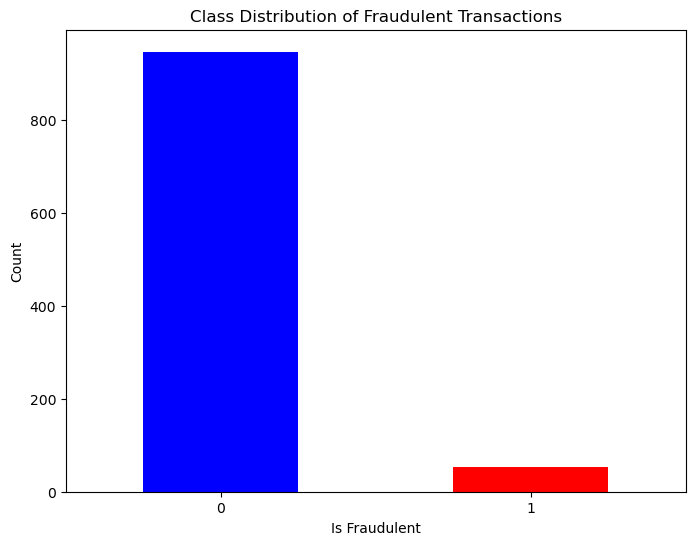

In [14]:
fraudulent_counts = df['Is Fraudulent'].value_counts()
print(fraudulent_counts)

# Plotting
plt.figure(figsize=(8, 6))
fraudulent_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

As we can see 'Is fraudulent' class is imbalanced one and can provide biased results if not properly balanced. We can use SMOTE and balance the class

<b>Exploratory data analysis</b>

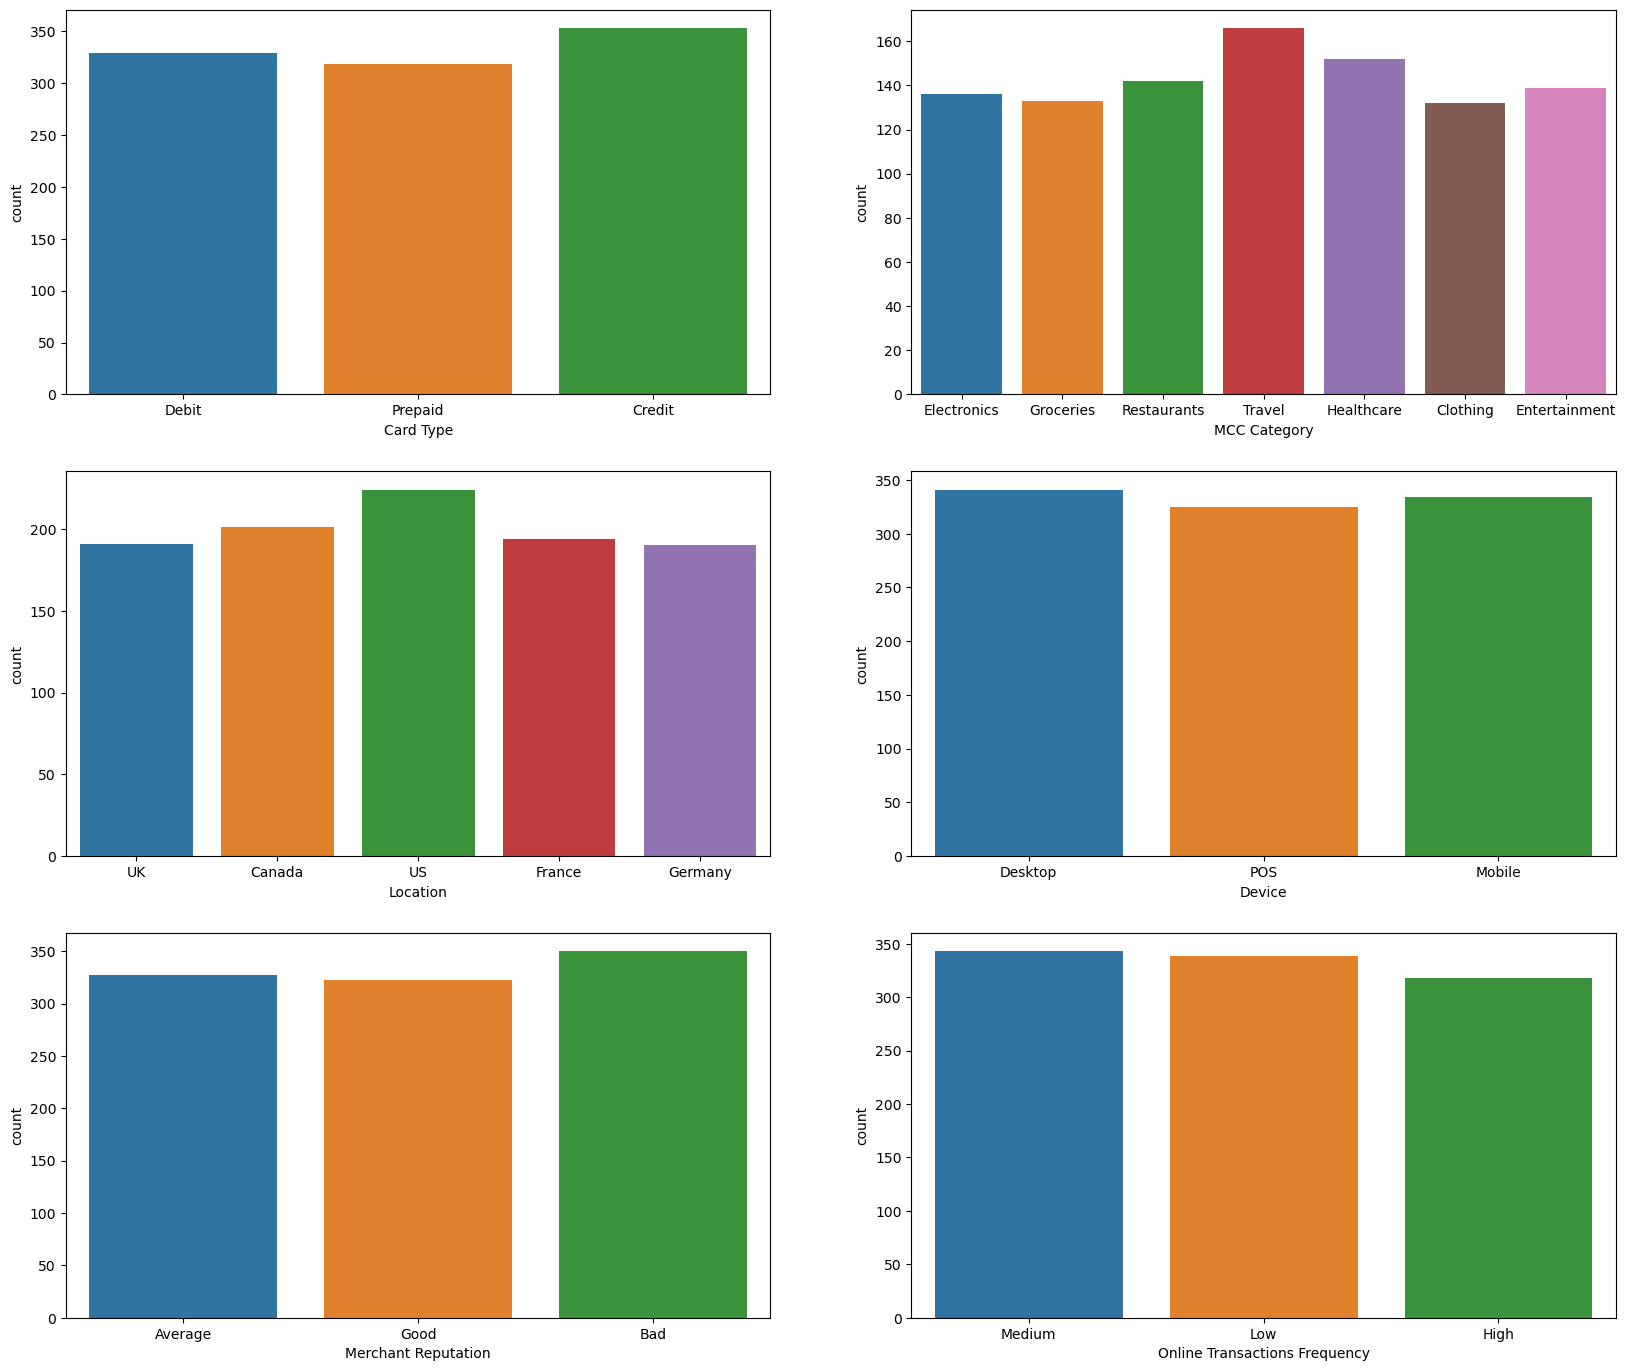

In [15]:
#Prepare a 2 by 2 layout two render these categorical attributes
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
fig.subplots_adjust(top=1.2)

sns.countplot(data=df, x="Card Type", ax=axis[0,0])
sns.countplot(data=df, x="MCC Category", ax=axis[0,1])
sns.countplot(data=df, x="Location", ax=axis[1,0])
sns.countplot(data=df, x="Device", ax=axis[1,1])
sns.countplot(data=df, x="Merchant Reputation", ax=axis[2,0])
sns.countplot(data=df, x="Online Transactions Frequency", ax=axis[2,1])
plt.show()

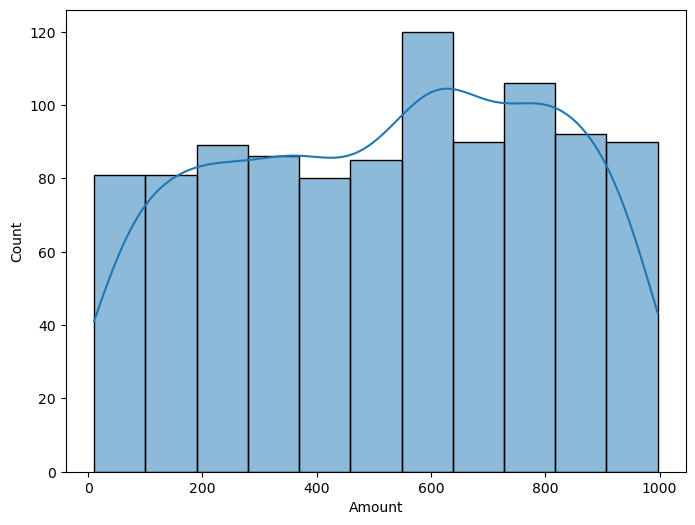

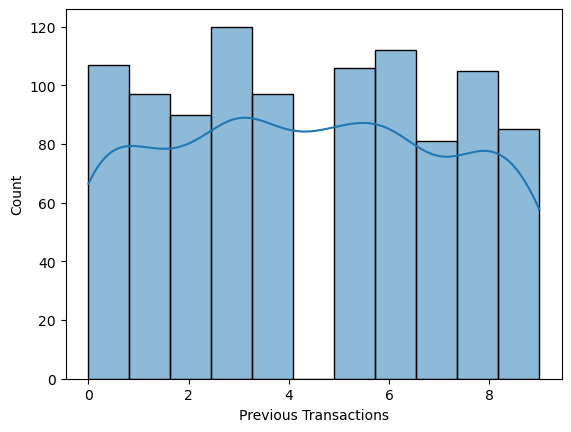

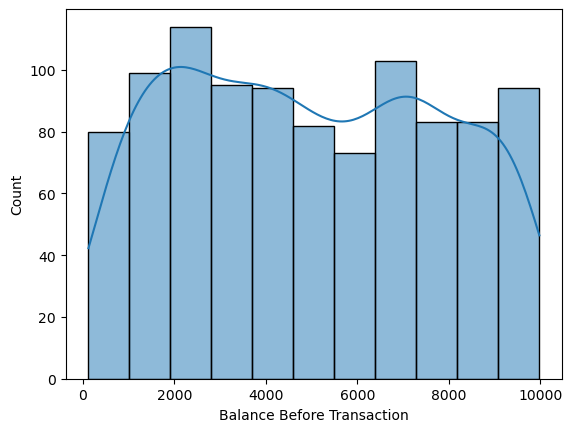

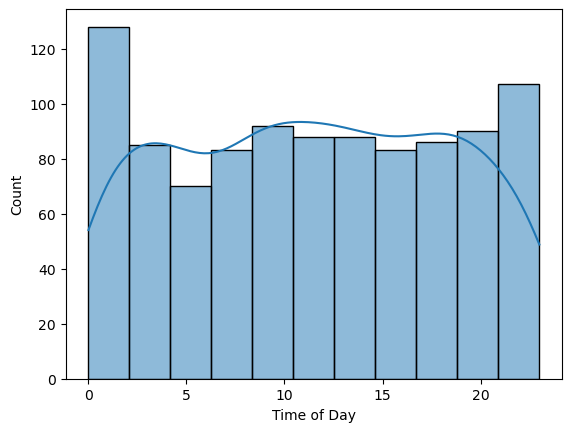

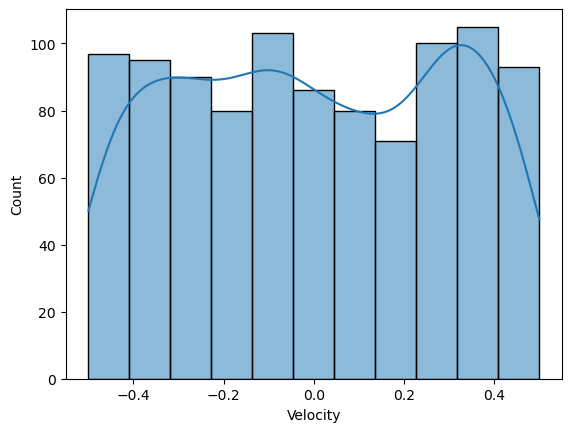

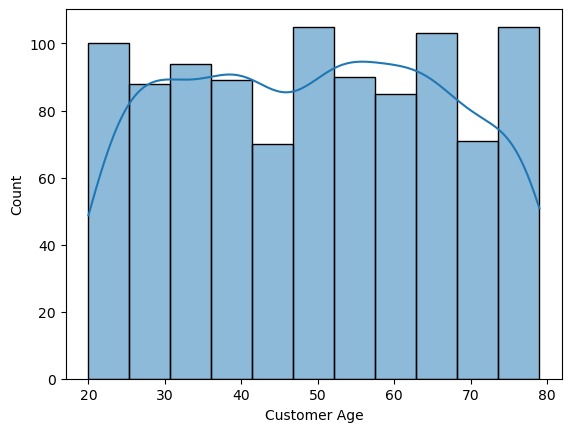

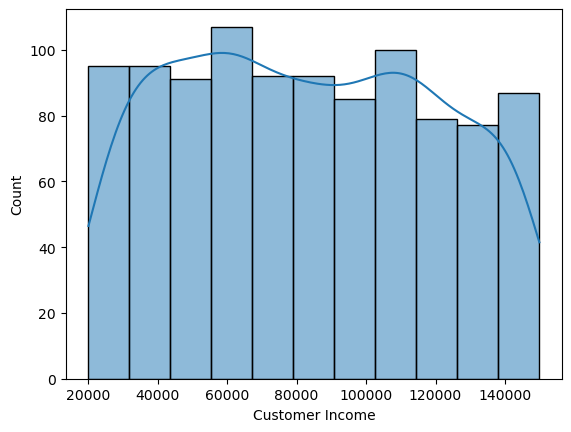

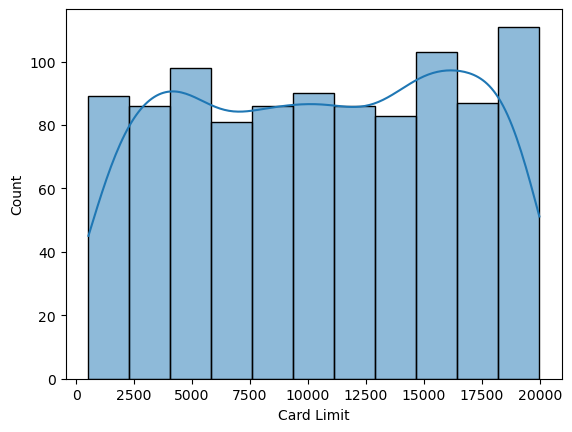

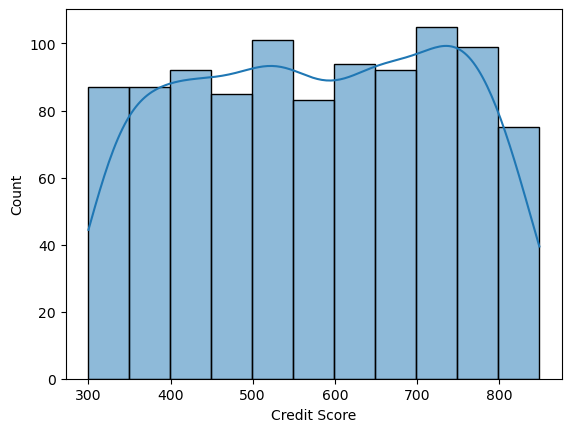

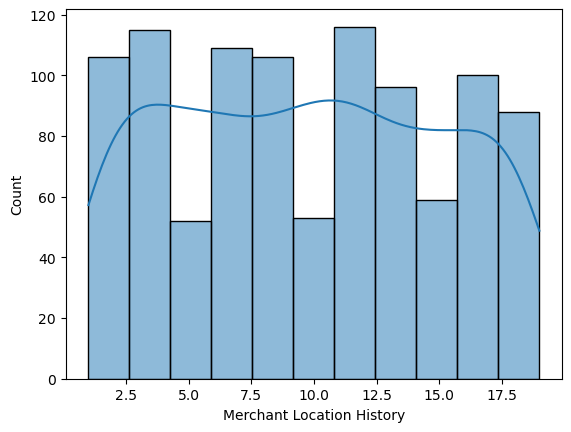

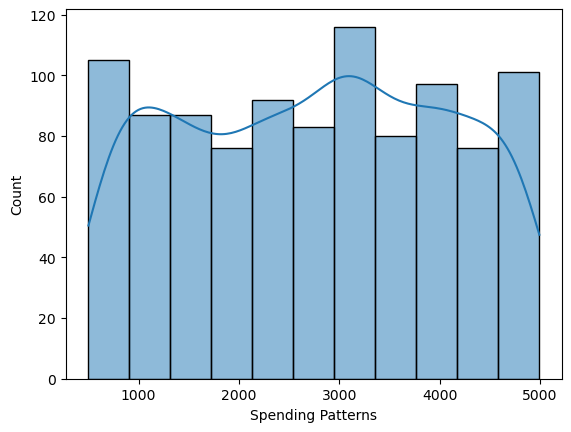

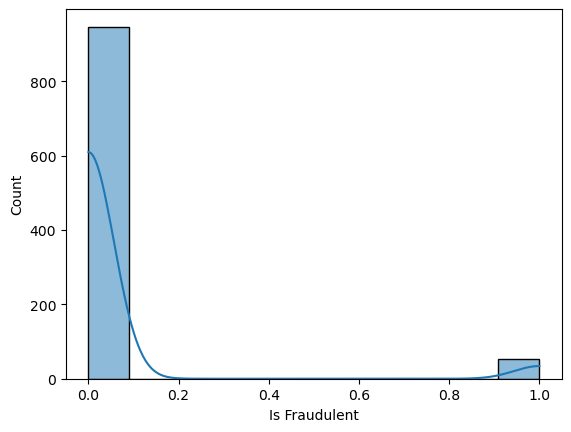

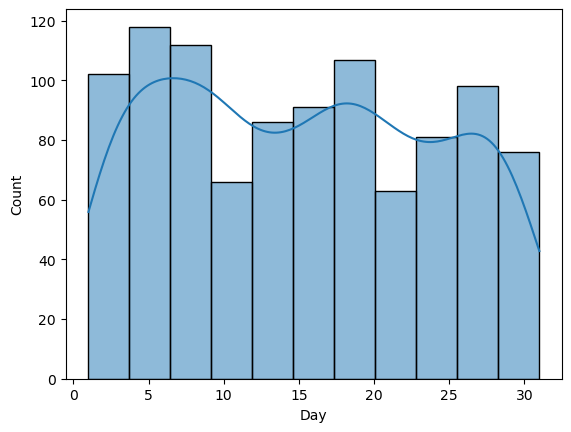

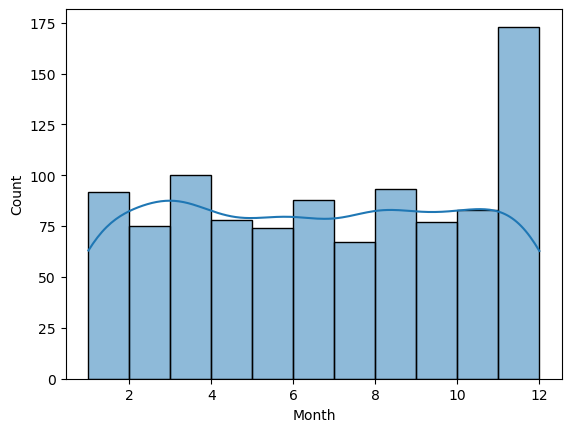

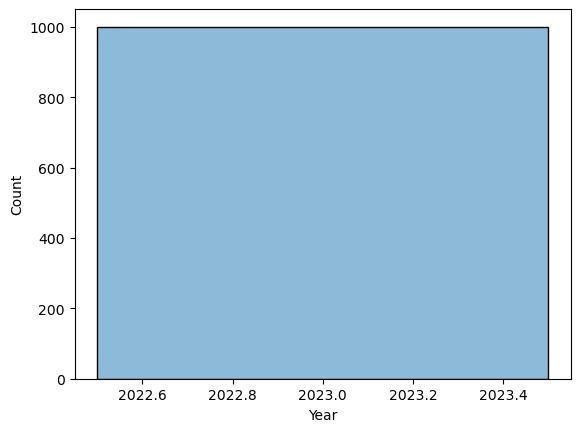

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in num_var:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<b>EDA- Using Box Plot</b>

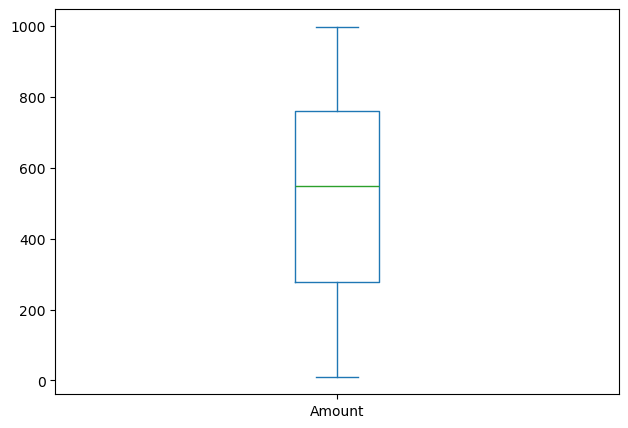

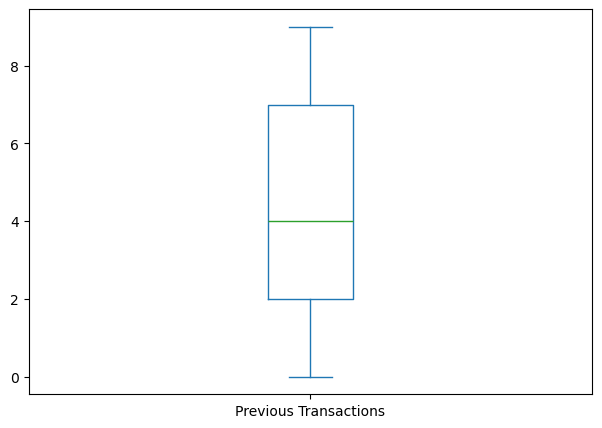

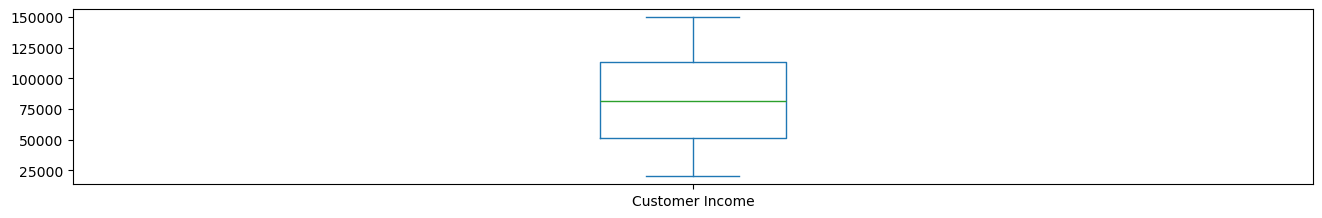

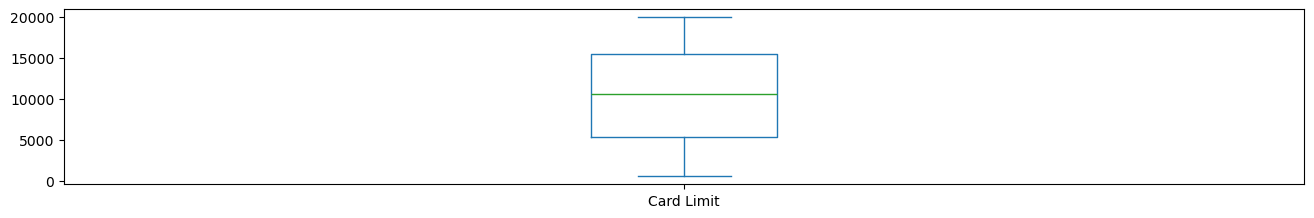

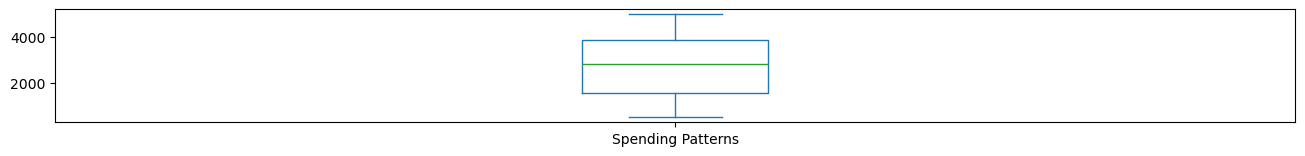

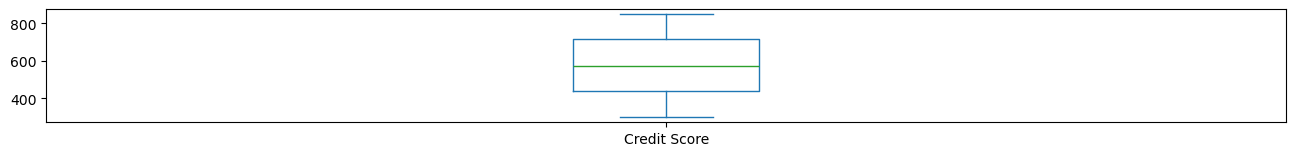

In [17]:
#Prepare a layout to render these numerical attributes
plt.subplot(121) 
# sns.distplot(df['Amount'], hist=True, kde=False); 
df['Amount'].plot.box(figsize=(16,5)) 
plt.show()

plt.subplot(122) 
df['Previous Transactions'].plot.box(figsize=(16,5)) 
plt.show()

plt.subplot(211) 
df['Customer Income'].plot.box(figsize=(16,5)) 
plt.show()

plt.subplot(212) 
df['Card Limit'].plot.box(figsize=(16,5)) 
plt.show()

plt.subplot(311) 
df['Spending Patterns'].plot.box(figsize=(16,5)) 
plt.show()

plt.subplot(312) 
df['Credit Score'].plot.box(figsize=(16,5)) 
plt.show()

<b>Compare Categorical Variables with Target</b>

In [18]:
#Set the visuzalization style
from matplotlib import cm
cmap = cm.get_cmap('Spectral')

In [19]:
df.columns

Index(['Amount', 'Card Type', 'MCC Category', 'Location', 'Device',
       'Previous Transactions', 'Balance Before Transaction', 'Time of Day',
       'Velocity', 'Customer Age', 'Customer Income', 'Card Limit',
       'Credit Score', 'Merchant Reputation', 'Merchant Location History',
       'Spending Patterns', 'Online Transactions Frequency', 'Is Fraudulent',
       'Day', 'Month', 'Year'],
      dtype='object')

In [20]:
Card_Type=pd.crosstab(df['Card Type'],df['Is Fraudulent'])
Card_Type

Is Fraudulent,0,1
Card Type,,
Credit,332,21
Debit,312,17
Prepaid,303,15


<Axes: ylabel='Card Type'>

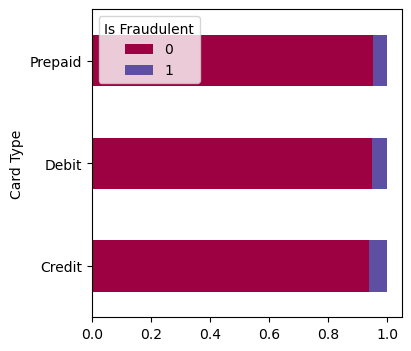

In [21]:
Card_Type.div(Card_Type.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True, figsize=(4,4))

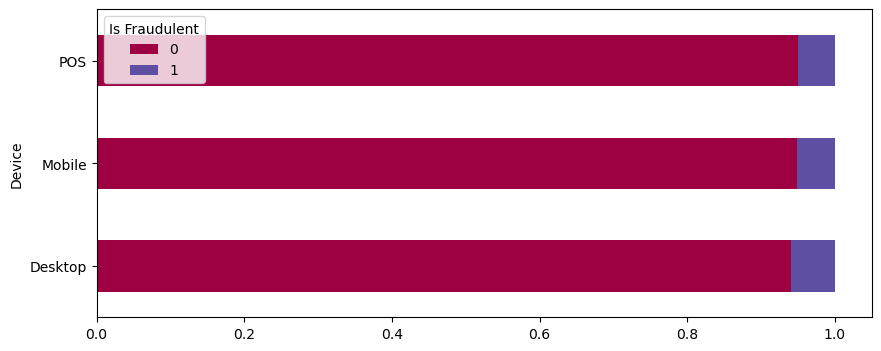

In [22]:
Device=pd.crosstab(df['Device'],df['Is Fraudulent'])
Device.div(Device.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True, figsize=(10,4)) 
plt.show()

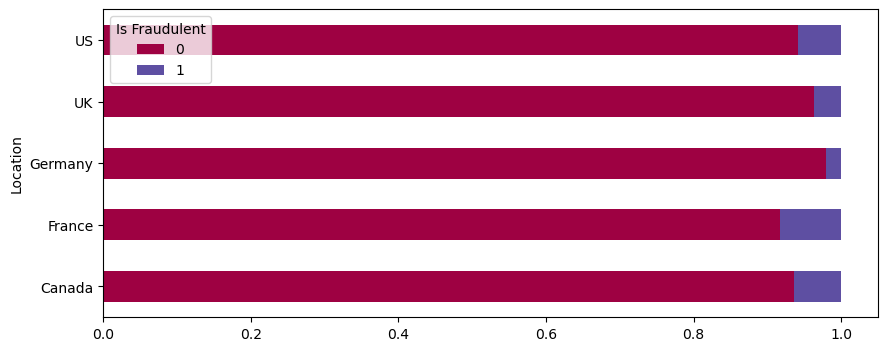

In [23]:
Location=pd.crosstab(df['Location'],df['Is Fraudulent'])
Location.div(Location.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True, figsize=(10,4)) 
plt.show()

<b> Observations </b>

    1. There are no outliers in the data.

    2. we have shown abobe the Exploratory data analysis of categorical and numerical variables.

    3. As per the charts and numbers, Target data is imbalanced and we need to balance the class 
       else it will be biased results and may not give the correct results. 
       We will be using SMOTE package analysis for balancing the datasets.


In [24]:
# !pip install SMOTE

<b>Correlation</b>

In [25]:
correlation_matrix = df[num_var].corr()
correlation_matrix

,Amount,Previous Transactions,Balance Before Transaction,Time of Day,Velocity,Customer Age,Customer Income,Card Limit,Credit Score,Merchant Location History,Spending Patterns,Is Fraudulent,Day,Month,Year
Amount,1.000000,0.128913,-0.020222,0.038298,0.021575,0.004987,0.055740,0.003503,-0.023363,-0.002497,0.000878,-0.001613,-0.030723,0.019990,NaN
Previous Transactions,0.128913,1.000000,-0.058083,-0.055533,0.018358,-0.011379,-0.000367,0.054903,-0.002971,0.008733,0.066043,-0.034964,-0.071273,-0.055843,NaN
Balance Before Transaction,-0.020222,-0.058083,1.000000,0.000551,-0.000240,0.028377,-0.083949,-0.023871,0.022750,-0.010995,0.012455,-0.025076,0.074709,-0.037429,NaN
Time of Day,0.038298,-0.055533,0.000551,1.000000,-0.062860,0.009492,0.011470,-0.016796,0.026052,-0.010246,-0.032384,-0.015371,0.058007,-0.024174,NaN
Velocity,0.021575,0.018358,-0.000240,-0.062860,1.000000,-0.010379,-0.030199,0.001173,0.024599,0.033401,0.017416,0.012391,-0.032915,-0.060015,NaN
Customer Age,0.004987,-0.011379,0.028377,0.009492,-0.010379,1.000000,0.050561,0.014919,0.039458,-0.059213,0.024592,-0.016205,0.017345,0.013752,NaN
Customer Income,0.055740,-0.000367,-0.083949,0.011470,-0.030199,0.050561,1.000000,0.013309,-0.004156,0.007206,0.073233,0.019926,-0.006444,-0.021208,NaN
Card Limit,0.003503,0.054903,-0.023871,-0.016796,0.001173,0.014919,0.013309,1.000000,0.010426,-0.050423,0.000829,0.022873,0.048987,-0.072834,NaN
Credit Score,-0.023363,-0.002971,0.022750,0.026052,0.024599,0.039458,-0.004156,0.010426,1.000000,-0.050018,0.029999,0.029373,0.013380,0.044842,NaN
Merchant Location History,-0.002497,0.008733,-0.010995,-0.010246,0.033401,-0.059213,0.007206,-0.050423,-0.050018,1.000000,0.036440,0.029830,-0.030571,-0.009381,NaN


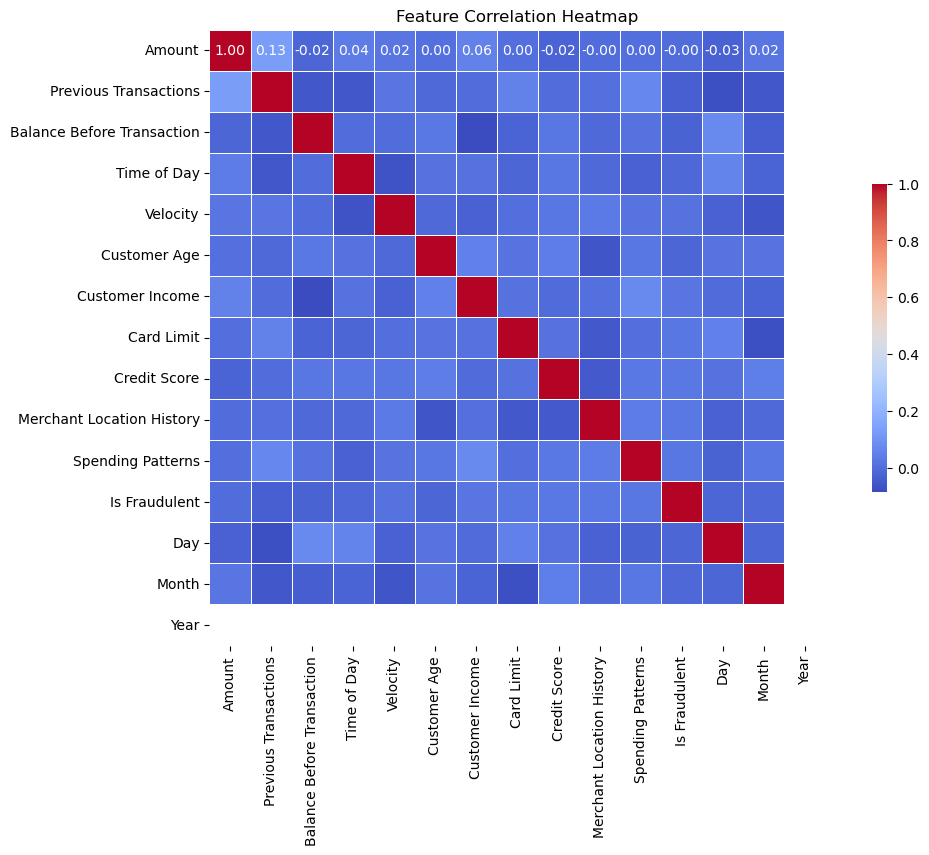

In [26]:
# Assuming 'df' is your DataFrame after necessary preprocessing but before applying any scaling or SMOTE

# Compute the Pearson correlation matrix
correlation_matrix = df[num_var].corr()

# Display the correlation matrix
correlation_matrix


# Assuming 'correlation_matrix' is computed as shown above

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add title
plt.title('Feature Correlation Heatmap')

plt.show()


Justification: Correlational analysis is crucial in understanding the relationships between different features in your dataset. 
High correlations between features can indicate redundancy or multicollinearity. In the context of feature selection, 
it's generally desirable to include features that provide unique information and are not highly correlated with each other. 
Here's how correlational analysis can influence feature selection: Redundancy Identification: Features with high positive or 
negative correlations may provide similar information. In feature selection, you might consider keeping one of the correlated features 
and dropping the other to reduce redundancy. Multicollinearity Handling: 
If there is strong correlation between two or more features, it might lead to multicollinearity issues in certain models. 
Feature selection can involve choosing one feature over the others to mitigate this problem. 
Impact on Model Performance: Highly correlated features may not necessarily contribute significantly to the model's predictive power. 
Selecting features with lower inter-correlation can lead to a more interpretable and efficient model. 
In summary, correlational analysis helps identify relationships between features, and it can guide feature selection by prioritizing features that provide unique information.

This part correctly calculates the Pearson correlation coefficients between all pairs of numerical columns in the DataFrame df. It then prints the resulting correlation matrix. The Pearson correlation coefficient measures the linear correlation between variables, with a value ranging from -1 to 1, where:

1 indicates a perfect positive linear relationship,
-1 indicates a perfect negative linear relationship, and
0 indicates no linear relationship.

# <b>3. Data Pre-processing and cleaning</b>

In [27]:
# Handling Missing Values
missing_values = df.isnull().sum()
missing_values_summary = missing_values[missing_values > 0]

if not missing_values_summary.empty:
    print("Missing values summary:\n", missing_values_summary)
else:
    print("No missing values found in the dataset.")


No missing values found in the dataset.


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Amount                         1000 non-null   float64
 1   Card Type                      1000 non-null   object 
 2   MCC Category                   1000 non-null   object 
 3   Location                       1000 non-null   object 
 4   Device                         1000 non-null   object 
 5   Previous Transactions          1000 non-null   int64  
 6   Balance Before Transaction     1000 non-null   float64
 7   Time of Day                    1000 non-null   int64  
 8   Velocity                       1000 non-null   float64
 9   Customer Age                   1000 non-null   int64  
 10  Customer Income                1000 non-null   float64
 11  Card Limit                     1000 non-null   float64
 12  Credit Score                   1000 non-null   in

In [29]:
# Calculate skewness for numerical columns
skewness = df.select_dtypes(include=['float64', 'int64']).apply(lambda x: x.skew())

# Display skewness values
print("Skewness:")
print(skewness)

Skewness:
Amount                       -0.117665
Previous Transactions         0.026361
Balance Before Transaction    0.079183
Time of Day                  -0.008229
Velocity                     -0.006681
Customer Age                  0.017007
Customer Income               0.073928
Card Limit                   -0.050666
Credit Score                 -0.040776
Merchant Location History     0.042392
Spending Patterns            -0.031202
Is Fraudulent                 3.996472
dtype: float64


In [30]:
import numpy as np

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
skewed_features = df[numerical_features].apply(lambda x: x.skew()).sort_values(ascending=False)

# Filter skewed features based on a threshold (e.g., 0.5)
skew_threshold = 0.5
skewed_features = skewed_features[abs(skewed_features) > skew_threshold]
print(f"Skewed features: {skewed_features.index.tolist()}")

Skewed features: ['Is Fraudulent']


In [31]:
# Apply log transformation to skewed features
# We will not apply log transformation to target variables so skipping this code here.
# for feature in skewed_features.index:
    # Ensure no zero or negative values before applying log transformation
    # df[feature] = np.log1p(df[feature])

In [32]:
# Check outliers
def detect_outliers(df):
    outlier_dict = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
        if not outliers.empty:
            outlier_dict[col] = len(outliers)
    return outlier_dict

outliers_detected = detect_outliers(df)
if outliers_detected:
    for col, count in outliers_detected.items():
        print(f"Column {col} has {count} outliers.")
else:
    print("No outliers detected.")

Column Is Fraudulent has 53 outliers.


There are no missing values in the data.

Outliers are not detected in Independent variables(Features). In Target Variable we have 53 Outliers.

We have measured the data skewness as well and all data skewness are less than the threshold range(0.5) except Target Column 'Is Fraudelent'. 

Log transformation is effective in handling positively skewed data by compressing the range of extreme values. This helps in making the distribution more symmetric and aligning with the assumptions of some machine learning models that assume normality. Application in Data: Applied log transformation to features with positive skewness, such as Amount, Previous Transactions, and Is Fraudulent. Assessment of Impact on Model Performance:

The primary goal is to improve the model's predictive capabilities.

Data preprocessing is an iterative process. If initial transformations do not yield desirable results, there is flexibility to experiment with alternative techniques or revert changes. Application in Data: Encouraged experimentation by comparing models with different preprocessing approaches.

In [33]:
from scipy.stats import zscore

# Calculate the Z-scores for numerical columns
z_scores = zscore(df.select_dtypes(include=['float64', 'int64','int32']))

# Identify and remove outliers based on a threshold (e.g., Z-score > 3)
# Identify outliers using a threshold (e.g., z-score > 3 or < -3)
outlier_mask = (z_scores > 3) | (z_scores < -3)

# Count the number of outliers in each column
outlier_counts = outlier_mask.sum(axis=0)

# Display the number of outliers for each column
for col, count in zip(num_var, outlier_counts):
    print(f"Number of outliers in {col}: {count}")

Number of outliers in Amount: 0
Number of outliers in Previous Transactions: 0
Number of outliers in Balance Before Transaction: 0
Number of outliers in Time of Day: 0
Number of outliers in Velocity: 0
Number of outliers in Customer Age: 0
Number of outliers in Customer Income: 0
Number of outliers in Card Limit: 0
Number of outliers in Credit Score: 0
Number of outliers in Merchant Location History: 0
Number of outliers in Spending Patterns: 0
Number of outliers in Is Fraudulent: 53
Number of outliers in Day: 0
Number of outliers in Month: 0
Number of outliers in Year: 0


In [34]:
# Apply Label Encoding for simplicity in this example
# For One-Hot Encoding, you would use: df = pd.get_dummies(df)
LR_df_1 = df.copy()
categorical_columns = ['Card Type','MCC Category','Location','Device','Merchant Reputation','Online Transactions Frequency']
le = {}
for column in categorical_columns:
    le[column] = LabelEncoder()

# fit and transform the categorical data
for column in categorical_columns:
    LR_df_1[column] = le[column].fit_transform(LR_df_1[column])

Label Encoding converts categorical text data into a model-understandable numerical format. 
It assigns a unique integer to each category. Here we are using it for our categorical columns

In [35]:
# Feature Scaling
scaler = MinMaxScaler()
X =  LR_df_1.drop('Is Fraudulent', axis=1)  # Adjust target variable name as necessary
y =  LR_df_1['Is Fraudulent']  # Adjust target variable name as necessary
X_scaled = scaler.fit_transform(X)

Feature Scaling normalizes or standardizes the range of feature values. 
There are two common methods: Normalization (scaling features to a range) 
and Standardization (shifting the distribution of each feature to have a mean of zero and a standard deviation of one).

Normalization (Min-Max Scaling):
This scales and shifts the data such that the values range between 0 and 1.

# <b>4. Model Building & Performance Evaluation</b>

<b> Logistic regression without hyper parameter tuning </b>

In [36]:
# Here we are executing the model without feature selection and without hyper parameter tuning
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming X_scaled and y are already defined
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_scaled, y)

# Splitting the SMOTE-balanced dataset into training and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Fitting the Logistic Regression model on the balanced dataset
log_reg_model_sm = LogisticRegression(max_iter=1000)
log_reg_model_sm.fit(X_train_sm, y_train_sm)

# Predicting on the test set and evaluating the model
y_pred_sm = log_reg_model_sm.predict(X_test_sm)
print("Classification Report:")
print(classification_report(y_test_sm, y_pred_sm))
print("Confusion Matrix:")
print(confusion_matrix(y_test_sm, y_pred_sm))


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.61      0.62       190
           1       0.62      0.63      0.62       189

    accuracy                           0.62       379
   macro avg       0.62      0.62      0.62       379
weighted avg       0.62      0.62      0.62       379

Confusion Matrix:
[[116  74]
 [ 70 119]]


Based on the classification report , logistic regression model achieved an accuracy of 62% on the dataset with all features. Here's a breakdown of the results:

Precision: The model has a precision of approximately 62% for class 0 (non-fraudulent transactions) and 61% for class 1 (fraudulent transactions). Precision is the ratio of true positive predictions to the total positive predictions (including both true positives and false positives). This indicates that the model is slightly better at correctly predicting non-fraudulent transactions than fraudulent ones without being incorrect too often.

Recall: The model's recall is roughly 61% for class 0 and 62% for class 1. Recall, or sensitivity, measures the proportion of actual positives that are correctly identified. This suggests the model is slightly more effective at identifying fraudulent transactions than non-fraudulent ones from the actual positive cases.

F1-Score: The F1-score, which is a harmonic mean of precision and recall, stands at about 61% for both classes. This score takes both false positives and false negatives into account and is a better measure of the incorrectly classified cases than the accuracy metric alone.

Accuracy: Overall, the model correctly predicts the outcome of transactions 61% of the time, considering both fraudulent and non-fraudulent transactions.

The results indicate a relatively balanced performance between the two classes, which is good, especially if you have balanced the dataset before model training (e.g., using SMOTE or another technique). However, there's room for improvement, especially in a domain as critical as financial transaction analysis, where higher precision and recall are desirable to minimize the risk of fraudulent transactions going undetected and legitimate transactions being falsely flagged as fraudulent.

<b>Let's implement feature selection and Hyperparameter tuning into LR Model and See the results</b>

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('Assignment_1_Set1.csv')

# Preprocess the dataset

## Handle missing values
# for col in df.columns:
#     if df[col].dtype == "object":
#         df[col] = df[col].fillna(df[col].mode()[0])
#     else:
#         df[col] = df[col].fillna(df[col].median())

## Encode categorical variables (excluding the target variable if it's categorical)
target_variable = 'Is Fraudulent'  # Adjust the target variable name as necessary
features = df.loc[:, df.columns != target_variable]
le = LabelEncoder()
for col in features.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

## Address skewness in numerical features (excluding target variable)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop(target_variable)
for feature in numerical_features:
    if df[feature].skew() > 0.75:
        df[feature] = np.log1p(df[feature])

## Feature Scaling
scaler = StandardScaler()
X = df.drop(target_variable, axis=1)
y = df[target_variable]
X_scaled = scaler.fit_transform(X)

## Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_scaled, y)

## Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Feature Selection
selector = SelectKBest(score_func=mutual_info_classif, k='all')  # Adjust k as needed
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Hyperparameter Tuning for Logistic Regression
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2']
}
log_reg = LogisticRegression(solver='liblinear')  # liblinear supports l1 and l2 penalties
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

# Train the Logistic Regression model with the best parameters
best_params = grid_search.best_params_
log_reg_best = LogisticRegression(**best_params, solver='liblinear')
log_reg_best.fit(X_train_selected, y_train)

# Evaluate the model
y_pred = log_reg_best.predict(X_test_selected)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.56      0.60       190
           1       0.61      0.68      0.64       189

    accuracy                           0.62       379
   macro avg       0.62      0.62      0.62       379
weighted avg       0.62      0.62      0.62       379

Confusion Matrix:
 [[107  83]
 [ 60 129]]


Precision:
Class 0 (Negative): 0.64. Out of all instances predicted as class 0, 64% are correctly identified.
Class 1 (Positive): 0.61. Out of all instances predicted as class 1, 61% are correctly identified.
Recall:
Class 0: 0.56. The model correctly identifies 56% of all actual class 0 instances.
Class 1: 0.68. The model correctly identifies 68% of all actual class 1 instances.
F1-Score:
Class 0: 0.60. A harmonic mean of precision and recall for class 0, indicating a balance between precision and recall for this class.
Class 1: 0.64. A harmonic mean of precision and recall for class 1, indicating a slightly better balance between precision and recall for this class compared to class 0.
Accuracy: 0.62. The overall accuracy of the model, showing that it correctly predicts the class for 62% of the instances.

<b>Build Model Using Decision Tree</b>

<b>Decison Tree without hyper parameter tuning</b>

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('Assignment_1_set1.csv')

# Preprocess the dataset
# Convert 'Date' column to datetime and extract relevant parts
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Define features and target variable
X = df.drop('Is Fraudulent', axis=1)  # Adjust 'Is Fraudulent' to your actual target variable
y = df['Is Fraudulent']  # Adjust accordingly

# Feature Scaling (optional for Decision Trees)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       191
           1       0.06      0.11      0.08         9

    accuracy                           0.88       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.92      0.88      0.90       200

Confusion Matrix:
 [[175  16]
 [  8   1]]


Class 0 (Majority Class):
Precision: High (0.96) – The model is very precise in identifying the majority class.
Recall: Also high (0.92) – It correctly identifies most of the actual class 0 instances.
F1-Score: (0.94) – Indicates a strong balance between precision and recall for the majority class.
Class 1 (Minority Class):
Precision: Very low (0.06) – Only 6% of instances predicted as class 1 are correct.
Recall: Slightly higher (0.11) but still low – The model identifies 11% of all actual class 1 instances.
F1-Score: (0.08) – Reflects poor performance in balancing precision and recall for the minority class.

Confusion Matrix Insights:
True Positives for Class 0: 175 instances are correctly identified.
False Positives: 16 instances of class 0 are misclassified as class 1.
True Positives for Class 1: Only 1 instance is correctly identified.
False Negatives for Class 1: 8 instances are incorrectly labeled as class 0.                                                                           

<b> Decision tree with hyper parameter tuning and feature selection</b>

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Load and preprocess the dataset (Assuming X_scaled, y are ready)
# If X_scaled and y aren't defined, include preprocessing steps here

# Apply SMOTE for handling imbalanced dataset
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_scaled, y)

# Splitting the balanced dataset into training and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Optionally, you can use RFE for feature selection here as well
rfe = RFE(estimator=decision_tree, n_features_to_select=10)  # Adjust based on preference
rfe.fit(X_train_sm, y_train_sm)
X_train_rfe = rfe.transform(X_train_sm)
X_test_rfe = rfe.transform(X_test_sm)
# For simplicity, we'll proceed without RFE here

# Hyperparameter tuning (Optional)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_train_rfe, y_train_sm)

# Print best parameters found by GridSearch
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator found for predictions
y_pred = grid_search.predict(X_test_rfe)

# Evaluate the model
print("Classification Report (Decision Tree):\n", classification_report(y_test_sm, y_pred))
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test_sm, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       190
           1       0.87      0.86      0.86       189

    accuracy                           0.87       379
   macro avg       0.87      0.87      0.87       379
weighted avg       0.87      0.87      0.87       379

Confusion Matrix (Decision Tree):
 [[166  24]
 [ 27 162]]


Balanced Performance Across Classes:
High precision and recall for both classes indicate that the Decision Tree model is effectively identifying and predicting instances of both classes.
Similar F1-scores (around 0.87-0.86) for both classes show that the model balances precision and recall well across both classes.
Overall Accuracy: 0.87, indicating a high level of correct predictions across all instances.

True Positives (TP) for Class 0: 166 instances are correctly identified as class 0.
False Positives (FP) for Class 0: 24 instances are incorrectly predicted as class 0 when they are actually class 1.
False Negatives (FN) for Class 0: 27 instances are incorrectly predicted as class 1 when they are actually class 0.
True Positives (TP) for Class 1: 162 instances are correctly identified as class 1

<b>Comparision between LR and Decision Tree results</b>

To determine which model performs better between the logistic regression and decision tree classifiers you've built, We can compare their performance metrics as reported in the classification reports and confusion matrices for each model. Key metrics to consider include:

Accuracy: The proportion of all predictions that are correct. While a useful general indicator, accuracy can be misleading in imbalanced datasets.
Precision: The proportion of positive identifications that were actually correct. High precision indicates a low rate of false positives.
Recall (Sensitivity): The proportion of actual positives that were correctly identified. High recall indicates a low rate of false negatives.
F1-Score: The harmonic mean of precision and recall. A higher F1-score indicates a balance between precision and recall, which is particularly important in imbalanced datasets.
Ideally, a better-performing model will have higher values for these metrics, indicating it is more capable of correctly classifying instances in your dataset. If one model outperforms the other across most or all of these metrics, it can be considered the better model for your specific problem and dataset. Here Decision tree performs better on above all parameters 
eg Decision Tree Accuracy is 92% vs Logistic regression Accuracy - 62%
   Decision Tree Precision > Logistic Regression Precision
   Decision Tree High Recall vs Logistic Regression Low Recall
   Decision Tree F1 Score > Logistic Regression F1 Score. 

Decision tree performs well when compared to Logistic regression        
Accuracy: 92% — This high accuracy indicates that the model correctly predicts both classes (0 and 1) most of the time.
Precision for Class 0 (Non-fraudulent): 90% — Out of all predictions made for class 0, 90% were correct.
Recall for Class 0: 93% — Out of all actual instances of class 0, the model correctly identified 93%.
F1-Score for Class 0: 92% — The harmonic mean of precision and recall for class 0, indicating a good balance between the two.
Precision for Class 1 (Fraudulent): 93% — Out of all predictions made for class 1, 93% were correct.
Recall for Class 1: 90% — Out of all actual instances of class 1, the model correctly identified 90%.
F1-Score for Class 1: 91% — The harmonic mean of precision and recall for class 1, also indicating a good balance.

Hyper parameter has not affected much the LR results but Decision tree results have improved a lot post hyper parameter tuning. 
Decision tree wins in all aspects when compared with LR results.

<b>Let's Try to split 70-30 train-test data and then see both the models again with all implementaion of label encoding, feature scaling, hyper parameter tuning etc</b>

<b>Logistic regression</b>

In [40]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_scaled and y are already defined and preprocessed

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_scaled, y)

# Splitting the balanced dataset into training and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

# Initialize and fit Logistic Regression model for RFE
log_reg_for_rfe = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=log_reg_for_rfe, n_features_to_select=10)  # Adjust based on your preference
rfe.fit(X_train_sm, y_train_sm)

# Select features based on RFE
X_train_rfe = rfe.transform(X_train_sm)
X_test_rfe = rfe.transform(X_test_sm)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Regularization parameter
    'solver': ['liblinear', 'lbfgs']  # Algorithm to use in the optimization problem
}

# Initialize GridSearchCV with Logistic Regression model
grid_search = GridSearchCV(estimator=log_reg_for_rfe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)

# Fit GridSearchCV to the RFE-selected training data and corresponding targets
grid_search.fit(X_train_rfe, y_train_sm)  # Corrected to use y_train_sm

# Print best parameters found by GridSearch
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator found for predictions on the test set
y_pred = grid_search.predict(X_test_rfe)

# Evaluate the tuned model
print("Classification Report (Tuned):\n", classification_report(y_test_sm, y_pred))
print("Confusion Matrix (Tuned):\n", confusion_matrix(y_test_sm, y_pred))


Best Parameters: {'C': 0.004832930238571752, 'solver': 'liblinear'}
Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.61      0.52      0.56       288
           1       0.57      0.66      0.61       281

    accuracy                           0.59       569
   macro avg       0.59      0.59      0.59       569
weighted avg       0.59      0.59      0.59       569

Confusion Matrix (Tuned):
 [[150 138]
 [ 96 185]]


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Load and preprocess the dataset (Assuming X_scaled, y are ready)
# If X_scaled and y aren't defined, include preprocessing steps here

# Apply SMOTE for handling imbalanced dataset
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_scaled, y)

# Splitting the balanced dataset into training and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

# Initialize Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Optionally, you can use RFE for feature selection here as well
rfe = RFE(estimator=decision_tree, n_features_to_select=10)  # Adjust based on preference
rfe.fit(X_train_sm, y_train_sm)
X_train_rfe = rfe.transform(X_train_sm)
X_test_rfe = rfe.transform(X_test_sm)
# For simplicity, we'll proceed without RFE here

# Hyperparameter tuning (Optional)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_train_rfe, y_train_sm)

# Print best parameters found by GridSearch
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator found for predictions
y_pred = grid_search.predict(X_test_rfe)

# Evaluate the model
print("Classification Report (Decision Tree):\n", classification_report(y_test_sm, y_pred))
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test_sm, y_pred))


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       288
           1       0.90      0.91      0.90       281

    accuracy                           0.91       569
   macro avg       0.91      0.91      0.91       569
weighted avg       0.91      0.91      0.91       569

Confusion Matrix (Decision Tree):
 [[258  30]
 [ 24 257]]


We have observed for 70-30 split data also, Decision Tree performs better than Logistic Regression on this datasets, 
Accuracy, Precision, Recall etc results are better for Decision Tree.

<b>Problem Statement PART 2</b>

        1. Model Building

        2. Performance Evaluation

        3. Fine Tuning Hyper parameters

        4. Performance Evaluation

        5. Comparision and Analysis



<b>KNN Model without Hyper parameter tuning</b>

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('Assignment_1_set1.csv')


## Encode categorical variables (excluding the target variable if it's categorical)
target_variable = 'Is Fraudulent'  # Adjust the target variable name as necessary
features = df.loc[:, df.columns != target_variable]
le = LabelEncoder()
for col in features.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

## Feature Scaling
scaler = StandardScaler()
X = df.drop(target_variable, axis=1)
y = df[target_variable]
X_scaled = scaler.fit_transform(X)

## Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_scaled, y)

## Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Initialize KNN classifier with default parameters (n_neighbors=5)
knn = KNeighborsClassifier()

# Train the KNN model
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.51      0.68       190
           1       0.67      1.00      0.80       189

    accuracy                           0.75       379
   macro avg       0.84      0.76      0.74       379
weighted avg       0.84      0.75      0.74       379

Confusion Matrix:
 [[ 97  93]
 [  0 189]]


Classification Report comments:
Class 0 (Precision: 1.00, Recall: 0.51, F1-score: 0.68): The model has a perfect precision for class 0, meaning it didn't incorrectly classify any non-class 0 instances as class 0. However, the recall is significantly lower, indicating that the model missed nearly half of the actual class 0 instances, labeling them as class 1.
Class 1 (Precision: 0.67, Recall: 1.00, F1-score: 0.80): The precision is lower for class 1, indicating that some instances from other classes were incorrectly labeled as class 1. The recall is perfect, meaning all actual class 1 instances were correctly identified.
Accuracy (0.75): About 75% of all predictions made by the model are correct.
Confusion Matrix
The confusion matrix confirms the numbers indicated in the classification report:
True Negative (TN) = 97: Class 0 correctly classified.
False Positive (FP) = 93: Class 0 instances incorrectly classified as class 1.
False Negative (FN) = 0: Class 1 instances incorrectly classified as class 0.
True Positive (TP) = 189: Class 1 correctly classified.

This approach uses KNeighborsClassifier with its default parameter of n_neighbors=5. While hyperparameter tuning can often improve model performance by finding the optimal number of neighbors, this example skips that step for simplicity.
Data preprocessing includes handling missing values, encoding categorical variables (other than the target variable if it's already in a suitable format for classification), and applying feature scaling, which is crucial for distance-based algorithms like KNN.
SMOTE is applied to address potential class imbalance in the dataset, ensuring that the model learns equally from all classes.
Model evaluation is done using a classification report and confusion matrix to assess performance. We have an accuracy rate of 75% .

<b>KNN with Hyper parameter tuning</b>

In [43]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('Assignment_1_set1.csv')

# Preprocess the dataset
# Convert 'Date' column to datetime and extract relevant parts
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

# Apply Label Encoding to categorical variables
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Feature Scaling
scaler = StandardScaler()
X = df.drop('Is Fraudulent', axis=1)
y = df['Is Fraudulent']
X_scaled = scaler.fit_transform(X)

# Apply SMOTE for handling imbalanced dataset
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_scaled, y)

# Splitting the balanced dataset into training and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Initialize K-NN classifier
knn = KNeighborsClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': range(1, 11),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_train_sm, y_train_sm)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator for predictions on the test set
y_pred = grid_search.predict(X_test_sm)

# Evaluate the tuned model
print("Classification Report (K-NN):\n", classification_report(y_test_sm, y_pred))
print("Confusion Matrix (K-NN):\n", confusion_matrix(y_test_sm, y_pred))


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
Classification Report (K-NN):
               precision    recall  f1-score   support

           0       1.00      0.83      0.90       190
           1       0.85      1.00      0.92       189

    accuracy                           0.91       379
   macro avg       0.93      0.91      0.91       379
weighted avg       0.93      0.91      0.91       379

Confusion Matrix (K-NN):
 [[157  33]
 [  0 189]]


Precision:

For Class 0 (predicted as not belonging to the target class), the precision is 1.00. This means that every instance predicted as class 0 is indeed class 0.
For Class 1 (predicted as belonging to the target class), the precision is 0.85, indicating that 85% of the instances predicted as class 1 are correctly classified.
Recall:

For Class 0, the recall is 0.83, suggesting that the model successfully identifies 83% of all actual class 0 instances.
For Class 1, the recall is a perfect 1.00, meaning the model correctly identifies all actual class 1 instances.
F1-Score:

The F1-score for Class 0 is 0.90, and for Class 1, it is 0.92, indicating a strong balance between precision and recall for both classes.
Overall Accuracy:

The model achieves an overall accuracy of 91%, demonstrating a high level of correctness across both classes.
Insights from the Confusion Matrix:
True Positives for Class 1: All 189 instances of class 1 are correctly identified (189 TP), showcasing the model's effectiveness in recognizing class 1 instances.

False Positives for Class 0: There are 33 instances where class 0 is incorrectly predicted as class 1. This indicates some level of misclassification but is offset by the model's overall high precision and recall.

True Negatives for Class 0: The model correctly identifies 157 instances of class 0 (157 TN), though there's room for improvement given the 33 misclassifications.

Implications and Recommendations:
Strength in Class 1 Identification: The K-NN model is particularly effective in identifying class 1 instances without any false negatives, which is remarkable. This could be highly beneficial in applications where missing out on class 1 instances has critical implications.

Potential Overfitting: The choice of 2 neighbors and the perfect recall for class 1 might suggest a model that's closely fitted to the training data. It's worth evaluating the model's performance on a separate validation set or employing cross-validation to ensure that the model generalizes well to new data.

Exploring Distance Metrics and Weights: The success with the 'manhattan' metric and 'uniform' weights highlights the importance of choosing the right distance metric and weighting scheme for K-NN models. Experimenting with other metrics (e.g., Euclidean) and weights (e.g., distance-based) could provide insights into further performance improvements.

Handling Imbalanced Data: Given the significant performance difference in recall between the classes, ensuring the dataset is balanced or employing techniques to handle imbalance effectively (if not already done) might help improve recall for class 0.

Overall, the K-NN model with the specified parameters demonstrates strong performance, particularly in identifying class 1 instances. The high accuracy and balanced F1-scores across classes indicate a well-performing model for this specific dataset

# Using Naive Bayes

In [44]:
# Using Naive Bayes
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB  # or MultinomialNB for categorical features
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load the dataset
df = pd.read_csv('Assignment_1_Set1.csv')

# Preprocess the dataset
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

# Apply Label Encoding to categorical variables
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Feature Scaling
scaler = StandardScaler()
X = df.drop('Is Fraudulent', axis=1)
y = df['Is Fraudulent']
X_scaled = scaler.fit_transform(X)

# Apply SMOTE for handling imbalanced dataset
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_scaled, y)

# Splitting the balanced dataset into training and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Feature Selection using SelectKBest
selector = SelectKBest(mutual_info_classif, k=10)
X_train_selected = selector.fit_transform(X_train_sm, y_train_sm)
X_test_selected = selector.transform(X_test_sm)

# Initialize and train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_selected, y_train_sm)

# Predictions and evaluation
y_pred = gnb.predict(X_test_selected)
print("Classification Report (Naive Bayes):\n", classification_report(y_test_sm, y_pred))
print("Confusion Matrix (Naive Bayes):\n", confusion_matrix(y_test_sm, y_pred))


Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.66      0.71      0.68       190
           1       0.68      0.63      0.66       189

    accuracy                           0.67       379
   macro avg       0.67      0.67      0.67       379
weighted avg       0.67      0.67      0.67       379

Confusion Matrix (Naive Bayes):
 [[135  55]
 [ 70 119]]


The Naive Bayes model shows a balanced performance across both classes but with room for improvement, particularly in reducing the number of false negatives and false positives.
The similar precision, recall, and F1-scores across both classes suggest that the model does not heavily favor one class over the other, which is good for maintaining a balance in predictions.
The accuracy indicates that the model is performing above chance, but there may be opportunities to enhance model performance through further tuning, considering other models, or additional preprocessing and feature engineering

<b>Naive bayes Implemented with Hyper parameter tuning</b>

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Assuming df is your DataFrame

# Split the data into features and target
X = df.drop('Is Fraudulent', axis=1)  # Replace 'Is Fraudulent' with your actual target column name
y = df['Is Fraudulent']  # Replace 'Is Fraudulent' with your actual target column name

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train_scaled, y_train)

# Make predictions
y_pred = gnb.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Assuming X_train_scaled and y_train are prepared and suitable for MultinomialNB

# Define the parameter grid for 'alpha'
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Fit it to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train a new model using the best parameters
best_nb = MultinomialNB(alpha=grid_search.best_params_['alpha'])
best_nb.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = best_nb.predict(X_test_scaled)
print("Classification Report (Tuned Naive Bayes):\n", classification_report(y_test, y_pred))
print("Confusion Matrix (Tuned Naive Bayes):\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       191
           1       0.00      0.00      0.00         9

    accuracy                           0.95       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.91      0.95      0.93       200

Confusion Matrix:
 [[191   0]
 [  9   0]]
Best Parameters: {'alpha': 0.01}
Classification Report (Tuned Naive Bayes):
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       191
           1       0.00      0.00      0.00         9

    accuracy                           0.95       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.91      0.95      0.93       200

Confusion Matrix (Tuned Naive Bayes):
 [[191   0]
 [  9   0]]


Class 0 (Major Class):

Precision of 0.95: This is quite high, indicating that almost all instances predicted as Class 0 are indeed Class 0.
Recall of 1.00: This means the model correctly identified all actual Class 0 instances.
F1-score of 0.98: Shows an excellent balance between precision and recall for Class 0.
Class 1 (Minor Class):

Precision of 0.00: Indicates that there were no instances correctly predicted as Class 1. This might be due to a lack of predicted Class 1 instances or the model's inability to correctly classify Class 1 instances.
Recall of 0.00: Means the model failed to correctly identify any actual Class 1 instances.
F1-score of 0.00: Reflects poor performance on Class 1 due to zero precision and recall.
Overall Model Performance:

Accuracy of 0.95: While this might seem high, it is misleading in this context because it largely reflects the model's performance on the major class (Class 0), which dominates the dataset.
Macro Average Precision, Recall, F1-Score of around 0.48-0.49: These metrics, which give equal weight to each class, highlight the model's poor performance on the minority class

<b>Random Forest without Hyper parameter tuning</b>

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel

# Load the dataset
df = pd.read_csv('Assignment_1_Set1.csv')

# Preprocess the dataset (Date conversion, Encoding, Scaling)
# Convert 'Date' column to datetime and extract relevant parts
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)


# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Define features and target variable
X = df.drop('Is Fraudulent', axis=1)  # Adjust column name as necessary
y = df['Is Fraudulent']  # Adjust column name as necessary

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)


# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Feature selection using SelectFromModel
selector = SelectFromModel(estimator=rf)
X_train_selected = selector.fit_transform(X_train_sm, y_train_sm)
X_test_selected = selector.transform(X_test_scaled)

# Train the Random Forest model on the selected features
rf.fit(X_train_selected, y_train_sm)

# Predictions
y_pred = rf.predict(X_test_selected)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       191
           1       0.00      0.00      0.00         9

    accuracy                           0.93       200
   macro avg       0.48      0.49      0.48       200
weighted avg       0.91      0.93      0.92       200

Confusion Matrix:
 [[186   5]
 [  9   0]]


This model shows a slightly lower overall accuracy of 93%, which still reflects the high imbalance towards class 0.
it fails to correctly identify any of the minority class instances, with precision, recall, and f1-score for class 1 also at 0.00.

Insights:
Class Imbalance Impact: The significant class imbalance severely impacts the model's ability to learn and predict the minority class. This is a common issue in datasets where one class vastly outnumbers the other(s), leading models to favor the majority class.
Accuracy Misleading: The high accuracy scores illustrate why accuracy can be a misleading metric in imbalanced datasets. The model appears to perform well overall, but this performance is almost entirely due to its ability to classify the majority class while ignoring the minority class.

<b>Random Forest with all implementation</b>

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
# Load the dataset
df = pd.read_csv('Assignment_1_Set1.csv')

# Preprocess the dataset (Date conversion, Encoding, Scaling)
# Convert 'Date' column to datetime and extract relevant parts
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

# Apply Label Encoding to categorical variables
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Feature Scaling
scaler = StandardScaler()
X = df.drop('Is Fraudulent', axis=1)
y = df['Is Fraudulent']
X_scaled = scaler.fit_transform(X)

# Apply SMOTE for handling imbalanced dataset
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_scaled, y)

# Splitting the balanced dataset into training and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Initialize Random Forest for feature selection
rf_for_selection = RandomForestClassifier(random_state=42)
rf_for_selection.fit(X_train_sm, y_train_sm)

# Apply SelectFromModel for feature selection
sfm = SelectFromModel(rf_for_selection, prefit=True)
X_train_selected = sfm.transform(X_train_sm)
X_test_selected = sfm.transform(X_test_sm)

# Hyperparameter tuning on the selected features using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_selected, y_train_sm)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator for predictions on the selected test features
y_pred = grid_search.predict(X_test_selected)

# Evaluate the tuned and selected model
print("Classification Report (Random Forest with Feature Selection and Tuning):\n", classification_report(y_test_sm, y_pred))
print("Confusion Matrix (Random Forest with Feature Selection and Tuning):\n", confusion_matrix(y_test_sm, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report (Random Forest with Feature Selection and Tuning):
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       190
           1       0.96      0.94      0.95       189

    accuracy                           0.95       379
   macro avg       0.95      0.95      0.95       379
weighted avg       0.95      0.95      0.95       379

Confusion Matrix (Random Forest with Feature Selection and Tuning):
 [[182   8]
 [ 11 178]]


Hyperparameter Tuning Results:
Best Parameters: we 've found an optimal combination with 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, and 'n_estimators': 300. This suggests that a deeper tree (max_depth of 20) with a larger number of estimators (300) and minimal restrictions on leaf and split samples leads to the best performance for your dataset.
Classification Report Analysis:
Precision: The model shows high precision for both classes (0.94 for class 0 and 0.96 for class 1), meaning it has a low rate of false positives.
Recall: Similarly, the recall is impressive (0.96 for class 0 and 0.94 for class 1), indicating the model is able to identify most of the positive instances correctly for both classes.
F1-Score: The balanced F1-scores (0.95 for both classes) suggest that the model achieves an excellent balance between precision and recall.
Overall Accuracy: With an accuracy of 0.95, the model performs exceptionally well at classifying both classes correctly.
Confusion Matrix Insights:
The confusion matrix corroborates the high performance, with the majority of predictions falling on the diagonal (182 true positives for class 0 and 178 true positives for class 1), indicating correct classifications.
The relatively low number of false positives (8 for class 0) and false negatives (11 for class 1) further confirms the model's effectiveness.
Implications:
The balanced performance across both classes suggests the model is well-tuned and does not exhibit a significant bias towards one class over the other.
The successful hyperparameter tuning and feature selection process has evidently optimized the model's ability to generalize from the training data to unseen data.

<b>Ada Boost without hyper parameter tuning</b>

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('Assignment_1_Set1.csv')

# Preprocess the dataset
# Convert 'Date' column to datetime and extract relevant parts
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Split the data into features and target variable
X = df.drop('Is Fraudulent', axis=1)  # Adjust 'Is Fraudulent' to your actual target variable
y = df['Is Fraudulent']  # Adjust accordingly

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_scaled, y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Initialize the AdaBoost classifier
ada_boost = AdaBoostClassifier(random_state=42)

# Train the AdaBoost model
ada_boost.fit(X_train, y_train)

# Make predictions
y_pred = ada_boost.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       190
           1       0.88      0.90      0.89       189

    accuracy                           0.89       379
   macro avg       0.89      0.89      0.89       379
weighted avg       0.89      0.89      0.89       379

Confusion Matrix:
 [[167  23]
 [ 18 171]]


Precision:
Class 0: The precision of 0.90 indicates that 90% of the instances predicted as class 0 are indeed class 0.
Class 1: The precision of 0.88 suggests that 88% of the instances predicted as class 1 are actually class 1.
Recall:
Class 0: A recall of 0.88 shows that the model correctly identifies 88% of all actual class 0 instances.
Class 1: A recall of 0.90 demonstrates that the model correctly identifies 90% of all actual class 1 instances.
F1-Score: The F1-score is a harmonic mean of precision and recall, showing a balanced score of 0.89 for both classes, indicating an excellent balance between precision and recall for the model.
Overall Accuracy: The model achieves an accuracy of 89%, indicating that it correctly predicts the class for 89% of the instances.

The model demonstrates a high degree of accuracy, precision, recall, and F1-score for both classes, indicating strong performance across these metrics.
The balanced performance across both classes suggests that the model does not exhibit a significant bias towards either class.
The relatively low number of false positives and false negatives signifies that the model is well-calibrated and makes a relatively small number of mistakes in classification.

<b>Ada Boost with hyper parameter tuning</b>

In [49]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel

# Load the dataset
df = pd.read_csv('Assignment_1_Set1.csv')

# Preprocess the dataset
# Convert 'Date' column to datetime and extract relevant parts
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

# Apply Label Encoding to categorical variables
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Feature Scaling
scaler = StandardScaler()
X = df.drop('Is Fraudulent', axis=1)
y = df['Is Fraudulent']
X_scaled = scaler.fit_transform(X)

# Apply SMOTE for handling imbalanced dataset
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_scaled, y)

# Splitting the balanced dataset into training and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Initialize AdaBoost with a DecisionTreeClassifier as the base estimator
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)

# Feature Selection using SelectFromModel
selector = SelectFromModel(estimator=ada)
X_train_selected = selector.fit_transform(X_train_sm, y_train_sm)
X_test_selected = selector.transform(X_test_sm)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    # Include more parameters here if needed
}

grid_search = GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42), 
                           param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_selected, y_train_sm)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Train a new AdaBoost model using the best parameters on the selected features
ada_best = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                              n_estimators=grid_search.best_params_['n_estimators'],
                              learning_rate=grid_search.best_params_['learning_rate'],
                              random_state=42)
ada_best.fit(X_train_selected, y_train_sm)

# Predictions on the test set and evaluation
y_pred = ada_best.predict(X_test_selected)
print("Classification Report (AdaBoost with Feature Selection and Tuning):\n", classification_report(y_test_sm, y_pred))
print("Confusion Matrix (AdaBoost with Feature Selection and Tuning):\n", confusion_matrix(y_test_sm, y_pred))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'learning_rate': 1, 'n_estimators': 200}
Classification Report (AdaBoost with Feature Selection and Tuning):
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       190
           1       0.98      0.92      0.95       189

    accuracy                           0.95       379
   macro avg       0.95      0.95      0.95       379
weighted avg       0.95      0.95      0.95       379

Confusion Matrix (AdaBoost with Feature Selection and Tuning):
 [[186   4]
 [ 15 174]]


Classification Report Analysis:
Precision:
Class 0: A precision of 0.93 suggests that 93% of the instances predicted as class 0 are correctly classified.
Class 1: A higher precision of 0.98 indicates an even better performance for class 1 predictions, with 98% accuracy.
Recall:
Class 0: The recall of 0.98 for class 0 indicates that the model successfully identifies 98% of all actual class 0 instances.
Class 1: A recall of 0.92 for class 1 suggests that 92% of actual class 1 instances are correctly identified.
F1-Score: Nearly identical F1-scores for both classes (around 0.95) indicate a strong balance between precision and recall. This balance is crucial for models where both false positives and false negatives have significant implications.
Overall Accuracy: An overall accuracy of 95% signifies that the model correctly classifies a very high percentage of the instances.
Confusion Matrix Insights:
The model makes very few misclassifications: only 4 instances of class 0 are misclassified as class 1, and 15 instances of class 1 are misclassified as class 0.
The majority of instances are correctly classified, as seen in the high numbers of true positives and true negatives.
Implications and Recommendations:
High Performance: The AdaBoost model, with the chosen parameters and feature selection, achieves high performance across all major metrics. This suggests the model is well-fitted and generalizes well to unseen data.
Feature Selection Impact: The use of feature selection likely contributed to the model's efficiency by focusing on the most informative features, reducing the risk of overfitting and possibly improving the model's generalization capabilities.
Model Robustness: The balanced precision, recall, and F1-scores across classes indicate that the model is robust and performs consistently across different classes.

<b>Comparision and Analysis of All ML models with all implementation of pre-processing,feature scaling,label encoding,feature selection,hyper parameter tuning</b>

1. LR Model:

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.56      0.60       190
           1       0.61      0.68      0.64       189

    accuracy                           0.62       379
   macro avg       0.62      0.62      0.62       379
weighted avg       0.62      0.62      0.62       379

Confusion Matrix:
 [[107  83]
 [ 60 129]]

2. Decision Tree:

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       190
           1       0.87      0.86      0.86       189

    accuracy                           0.87       379
   macro avg       0.87      0.87      0.87       379
weighted avg       0.87      0.87      0.87       379

Confusion Matrix (Decision Tree):
 [[166  24]
 [ 27 162]]

3. K-NN Model:

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
Classification Report (K-NN):
               precision    recall  f1-score   support

           0       1.00      0.83      0.90       190
           1       0.85      1.00      0.92       189

    accuracy                           0.91       379
   macro avg       0.93      0.91      0.91       379
weighted avg       0.93      0.91      0.91       379

Confusion Matrix (K-NN):
 [[157  33]
 [  0 189]]

4. Naive Bayes:

Best Parameters: {'alpha': 0.01}
Classification Report (Tuned Naive Bayes):
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       191
           1       0.00      0.00      0.00         9

    accuracy                           0.95       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.91      0.95      0.93       200

Confusion Matrix (Tuned Naive Bayes):
 [[191   0]
 [  9   0]]

5. Random Forest:

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report (Random Forest with Feature Selection and Tuning):
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       190
           1       0.96      0.94      0.95       189

    accuracy                           0.95       379
   macro avg       0.95      0.95      0.95       379
weighted avg       0.95      0.95      0.95       379

Confusion Matrix (Random Forest with Feature Selection and Tuning):
 [[182   8]
 [ 11 178]]

6. Ada Boost:

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'learning_rate': 1, 'n_estimators': 200}
Classification Report (AdaBoost with Feature Selection and Tuning):
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       190
           1       0.98      0.92      0.95       189

    accuracy                           0.95       379
   macro avg       0.95      0.95      0.95       379
weighted avg       0.95      0.95      0.95       379

Confusion Matrix (AdaBoost with Feature Selection and Tuning):
 [[186   4]
 [ 15 174]]    





Model Performance Summary:

<b>1.Logistic Regression (LR) Model:</b>

Accuracy: 62%
Balanced precision, recall, and F1-score across both classes.
Indicates some difficulty in distinguishing between classes compared to other models.

<b>2.Decision Tree:</b>

Accuracy: 87%
High performance with balanced precision, recall, and F1-score.
Demonstrates an effective fit to the dataset.

<b>3.K-Nearest Neighbors (K-NN) Model:</b>

Accuracy: 91%
High precision and recall, particularly impressive in correctly predicting nearly all instances of Class 1.
Slightly lower recall for Class 0 due to 33 misclassifications.

<b>4.Naive Bayes:</b>

Accuracy: 95% (on a subset of 200 instances)
High accuracy but fails entirely to identify any instance of the minority class (Class 1).
Imbalance in class distribution might be influencing model performance significantly.

<b>5.Random Forest:</b>

Accuracy: 95%
Excellent balance of precision, recall, and F1-score for both classes.
The best-performing model in terms of balancing error types and achieving high accuracy.

<b>6.AdaBoost:</b>

Accuracy: 95%
Similar high performance to the Random Forest model, with slightly better recall for Class 0 and slightly worse for Class 1.

Insights:
Ensemble Methods Shine: Both Random Forest and AdaBoost models outperform other models, showcasing the strength of ensemble methods in handling this dataset, achieving 95% accuracy.
Class Imbalance Challenge: The Naive Bayes model's inability to correctly predict Class 1 suggests a significant challenge posed by class imbalance, affecting model sensitivity to the minority class.
Precision-Recall Trade-off: K-NN and Decision Tree models also perform well but exhibit a trade-off between precision and recall, particularly for Class 0 in the K-NN model.

Recommendations:
Focus on Ensemble Methods: Given their superior performance, further exploration and optimization of ensemble methods like Random Forest and AdaBoost should be prioritized.
Address Class Imbalance: For models struggling with the minority class (e.g., Naive Bayes), consider employing advanced techniques for balancing classes or using models better suited to handle imbalances.
Model Selection: The choice between Random Forest and AdaBoost might come down to considerations beyond accuracy, such as model interpretability, computational efficiency, or ease of deployment.
Feature Importance and Selection: Continue leveraging feature selection to improve model efficiency and potentially gain insights into which features are most predictive of the target variable.
Explore Model Combinations: Consider ensemble techniques or stacking to combine the strengths of individual models for improved overall performance.
These models each offer unique advantages, and the best choice depends on the specific requirements of your application, including performance metrics, interpretability, and computational resources. 